<a href="https://colab.research.google.com/github/Olamideod/Dog-Cat_Image_classification/blob/master/Cat_%26_Dog_Imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/archive


/content/drive/MyDrive/archive


In [6]:
!ls

train  train.csv  val  val.csv


In [7]:
%cd train

/content/drive/MyDrive/archive/train


In [8]:
#Create Files_Name
image_data='/content/drive/MyDrive/archive/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [9]:
#Create Files_Name
image_test_data='/content/drive/MyDrive/archive/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [10]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/archive/train/cat/Maine...,cat
1,/content/drive/MyDrive/archive/train/dog/keesh...,dog
2,/content/drive/MyDrive/archive/train/dog/wheat...,dog
3,/content/drive/MyDrive/archive/train/cat/Egypt...,cat
4,/content/drive/MyDrive/archive/train/cat/Russi...,cat
...,...,...
280,/content/drive/MyDrive/archive/train/cat/Benga...,cat
281,/content/drive/MyDrive/archive/train/cat/Birma...,cat
282,/content/drive/MyDrive/archive/train/dog/japan...,dog
283,/content/drive/MyDrive/archive/train/dog/engli...,dog


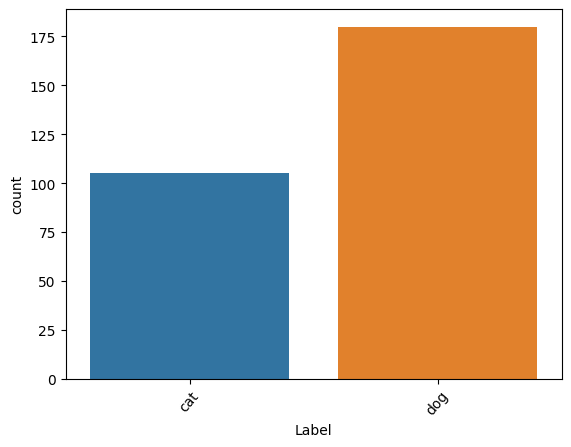

In [11]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [12]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 285 files belonging to 2 classes.
Using 228 files for training.
Found 285 files belonging to 2 classes.
Using 57 files for validation.


In [13]:
class_names = train.class_names
class_names

['cat', 'dog']

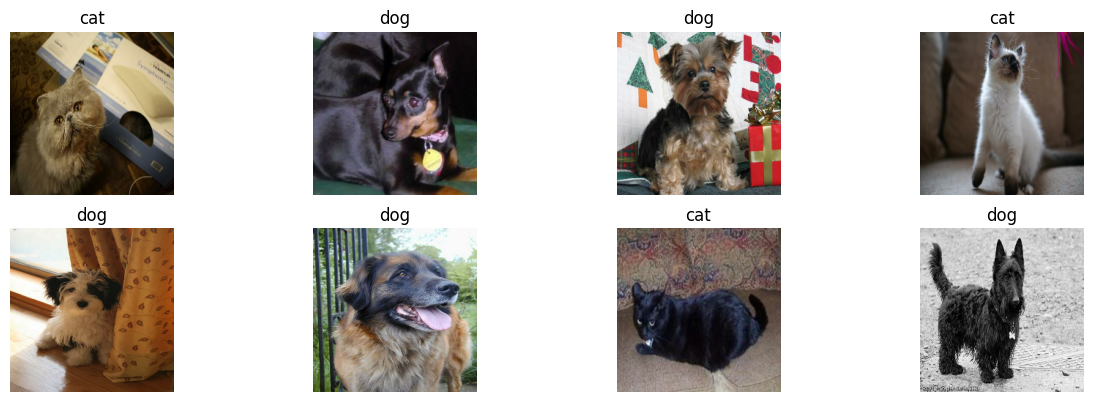

In [14]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Modeling**

In [15]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 7056566 (26.92 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


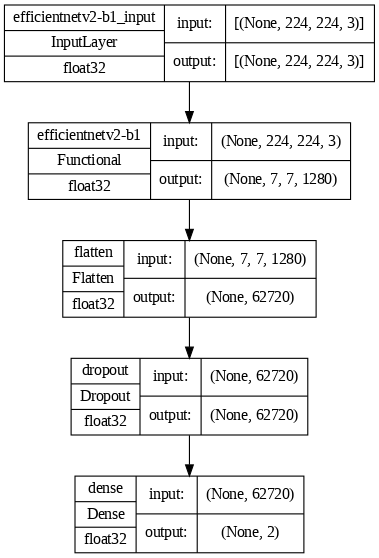

In [16]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [17]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [19]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [20]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=40,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/40
8/8 [==============================] - 26s 1s/step - loss: 0.2916 - accuracy: 0.8816 - val_loss: 4.2129e-05 - val_accuracy: 1.0000
Epoch 2/40
8/8 [==============================] - 2s 233ms/step - loss: 6.4361e-04 - accuracy: 1.0000 - val_loss: 2.7564e-06 - val_accuracy: 1.0000
Epoch 3/40
8/8 [==============================] - 2s 195ms/step - loss: 8.4735e-05 - accuracy: 1.0000 - val_loss: 6.7760e-07 - val_accuracy: 1.0000
Epoch 4/40
8/8 [==============================] - 2s 216ms/step - loss: 7.0897e-07 - accuracy: 1.0000 - val_loss: 3.1371e-07 - val_accuracy: 1.0000
Epoch 5/40
8/8 [==============================] - 2s 206ms/step - loss: 8.3236e-05 - accuracy: 1.0000 - val_loss: 2.3424e-07 - val_accuracy: 1.0000
Epoch 6/40
8/8 [==============================] - 2s 232ms/step - loss: 1.5215e-04 - accuracy: 1.0000 - val_loss: 2.2796e-07 - val_accuracy: 1.0000
Epoch 7/40
8/8 [==============================] - 1s 95ms/step - loss: 0.0411 - accuracy: 0.9912 - val_loss: 4.1329e-0

In [21]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.916466e-01,0.881579,4.212943e-05,1.0
1,6.436074e-04,1.000000,2.756350e-06,1.0
2,8.473542e-05,1.000000,6.776042e-07,1.0
3,7.089684e-07,1.000000,3.137073e-07,1.0
4,8.323609e-05,1.000000,2.342351e-07,1.0
5,1.521481e-04,1.000000,2.279610e-07,1.0
6,4.111434e-02,0.991228,4.132919e-05,1.0
7,4.077283e-02,0.991228,4.784933e-06,1.0
8,3.827905e-04,1.000000,4.120008e-07,1.0
9,1.170125e-03,1.000000,1.463971e-07,1.0


In [25]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 0s 75ms/step - loss: 2.9279e-08 - accuracy: 1.0000
Test Loss = 2.927944997566101e-08
Test Accuracy = 1.0


In [26]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.916466e-01,0.881579,4.212943e-05,1.0
1,6.436074e-04,1.000000,2.756350e-06,1.0
2,8.473542e-05,1.000000,6.776042e-07,1.0
3,7.089684e-07,1.000000,3.137073e-07,1.0
4,8.323609e-05,1.000000,2.342351e-07,1.0
5,1.521481e-04,1.000000,2.279610e-07,1.0
6,4.111434e-02,0.991228,4.132919e-05,1.0
7,4.077283e-02,0.991228,4.784933e-06,1.0
8,3.827905e-04,1.000000,4.120008e-07,1.0
9,1.170125e-03,1.000000,1.463971e-07,1.0


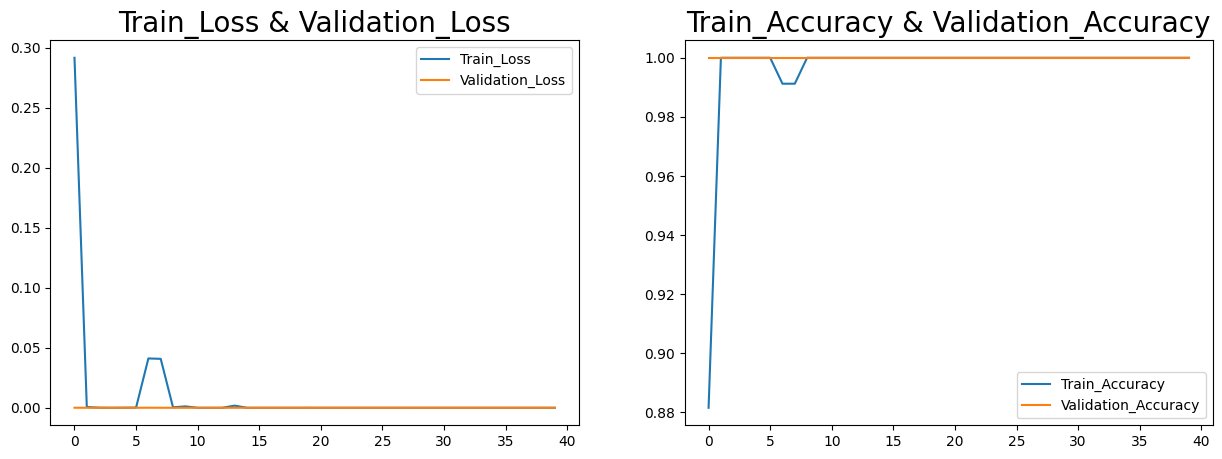

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [28]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    image_test_data,
    image_size=(224,224),
    validation_split=None,
)

Found 70 files belonging to 2 classes.


In [29]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

3/3 [==============================] - 14s 368ms/step - loss: 6.6074e-07 - accuracy: 1.0000
Test Loss = 6.60744774449995e-07
Test Accuracy = 1.0


In [31]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test

,Model,loss,accuracy
0,valid,2.927945e-08,1.0
1,test,6.607448e-07,1.0


In [5]:
from google.colab import files

# Upload an image file
uploaded = files.upload()


Saving english_cocker_spaniel_111_jpg.rf.bdeac76d1b0ec3bf7fd6a9cddfadfd16.jpg to english_cocker_spaniel_111_jpg.rf.bdeac76d1b0ec3bf7fd6a9cddfadfd16.jpg


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the uploaded image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image data if your training data is normalized


In [12]:
import os

# List files in the current directory
files_in_directory = os.listdir()
if "my_keras_model.h5" in files_in_directory:
    print("Model file found in the current directory.")
else:
    print("Model file not found in the current directory.")


Model file not found in the current directory.


In [13]:
from google.colab import files

# Upload the model file
uploaded = files.upload()


Saving american_bulldog_15_jpg.rf.203ca553122b6550e27f9be376422eea.jpg to american_bulldog_15_jpg.rf.203ca553122b6550e27f9be376422eea.jpg


In [22]:
!ls

american_bulldog_15_jpg.rf.203ca553122b6550e27f9be376422eea.jpg
drive
english_cocker_spaniel_111_jpg.rf.bdeac76d1b0ec3bf7fd6a9cddfadfd16.jpg
sample_data
